In [51]:
import numpy as np
import math
import time as t
import matplotlib.pyplot as plt
import scipy.io.wavfile 

In [5]:
# Previous implementation of the dft matrix.
def dft_matrix(n):
    m = np.zeros((n,n), dtype=np.complex128)
    root = math.e ** (-2*np.pi*1j/n)

    for j in range(n):
        for k in range(n):
            m[j,k] = root ** (j*k)
    m = m/np.sqrt(n)
    return m


In [6]:
def dft(x):
    dftm = dft_matrix(len(x))
    return np.matmul(dftm, x)

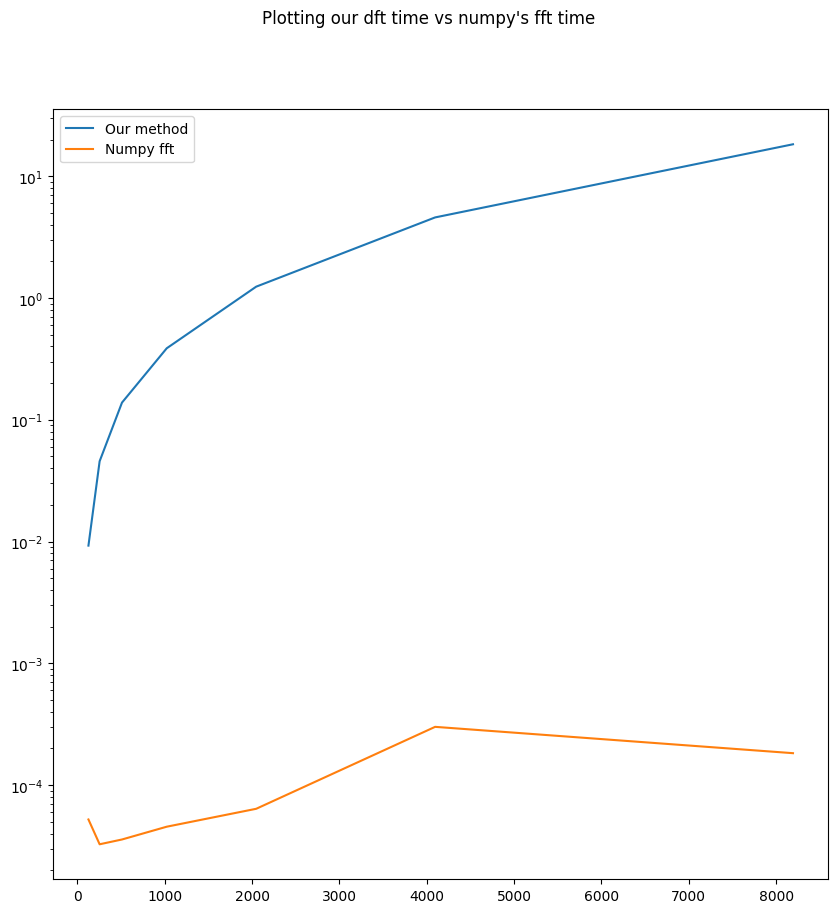

In [7]:
# Comparing our dft implementation with numpy's np.fft
fig, axs = plt.subplots(1, figsize=(10,10))
fig.suptitle("Plotting our dft time vs numpy's fft time")

signal = lambda t: np.sin(2*np.pi*t * 10) + np.cos(2*np.pi*t* 30)
num_sample_list = [128, 256, 512, 1024, 2048, 4096, 8192]

our_times = []
their_times = []

for num_samples in num_sample_list:
    time = np.linspace(0,1,num_samples)
    samples = signal(time)

    now = t.time()
    our_dft = dft(samples)
    end = t.time()
    our_dft_time = end-now

    now = t.time()
    their_dft = np.fft.fft(samples)
    end = t.time()
    their_dft_time = end-now


    our_times.append(our_dft_time)
    their_times.append(their_dft_time)

axs.set_yscale("log")
axs.plot(num_sample_list, our_times, label="Our method")
axs.plot(num_sample_list, their_times, label = "Numpy fft")
axs.legend()


<StemContainer object of 3 artists>

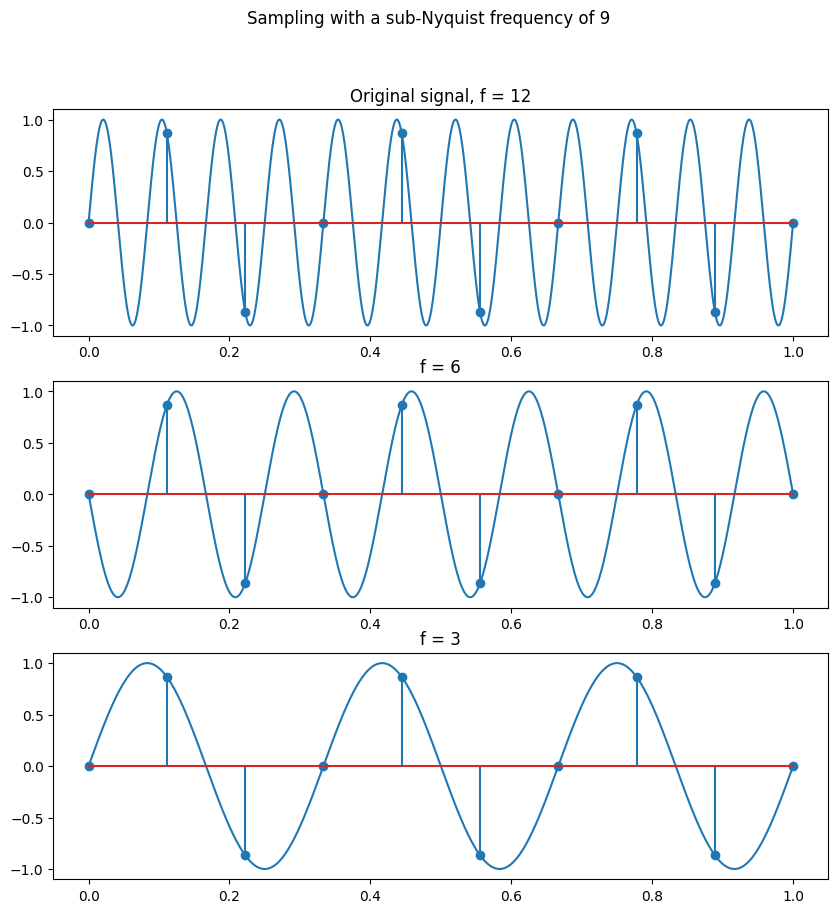

In [222]:
# Visualization of the sub-niquist sampling problem.

fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle("Sampling with a sub-Nyquist frequency of 9")

sample_frequency = 9  

signal1 = lambda t: np.sin(2*np.pi*t * 12)
signal2 = lambda t: np.sin(2*np.pi*t * 3)
signal3 = lambda t: -np.sin(2*np.pi*t * 6)

time = np.linspace(0, 1, 10000)
sample_time = np.linspace(0,1, sample_frequency+1) 

axs[0].set_title("Original signal, f = 12")
axs[0].plot(time, signal1(time))
axs[0].stem(sample_time, signal1(sample_time))

axs[1].set_title("f = 6")
axs[1].plot(time, signal3(time))
axs[1].stem(sample_time, signal1(sample_time))

axs[2].set_title("f = 3")
axs[2].plot(time, signal2(time))
axs[2].stem(sample_time, signal1(sample_time))

<StemContainer object of 3 artists>

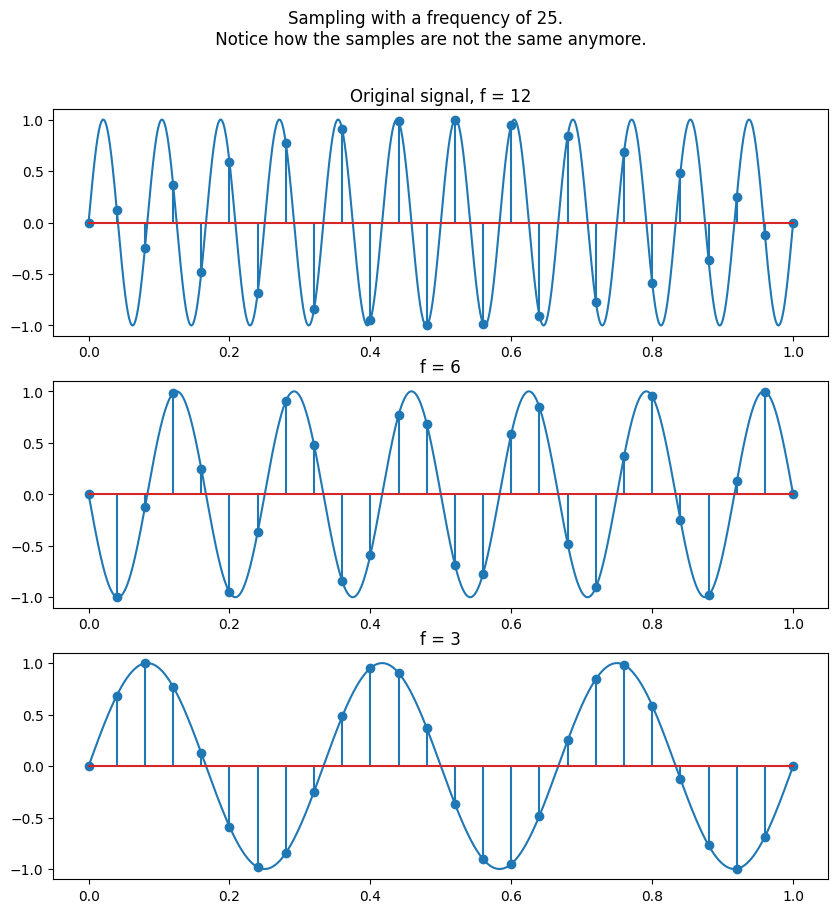

In [49]:
# Increasing the frequency to one >= the niquist frequency fixes the problem. 

fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle("Sampling with a frequency of 25. \n Notice how the samples are not the same anymore.")

sample_frequency = 25  

signal1 = lambda t: np.sin(2*np.pi*t * 12)
signal2 = lambda t: np.sin(2*np.pi*t * 3)
signal3 = lambda t: -np.sin(2*np.pi*t * 6)

time = np.linspace(0, 1, 10000)
sample_time = np.linspace(0,1, sample_frequency+1) 

axs[0].set_title("Original signal, f = 12")
axs[0].plot(time, signal1(time))
axs[0].stem(sample_time, signal1(sample_time))

axs[1].set_title("f = 6")
axs[1].plot(time, signal3(time))
axs[1].stem(sample_time, signal3(sample_time))

axs[2].set_title("f = 3")
axs[2].plot(time, signal2(time))
axs[2].stem(sample_time, signal2(sample_time))

In [50]:
# Frecventele emise de un contrabas se incadreaza intre 40Hz si 200Hz.
# Frecventa minima cu care trebuie esantionat semnalul astfel incat semnalul discretizat
# sa contina toate componentele de frecventa este de 200 * 2 + 1 = 400 Hz

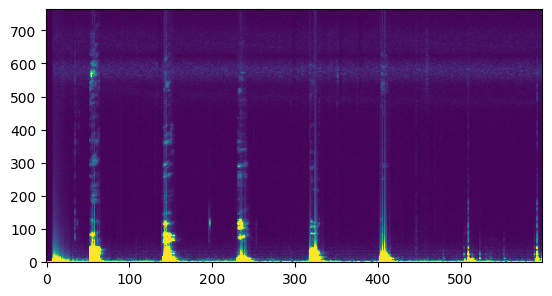

In [226]:
# Generating the spectrogram.
frequency, samples = scipy.io.wavfile.read("vowels.wav")
num_samples = len(samples)
num_samples_per_group = num_samples//300

groups = []

for x in range(0, num_samples, num_samples_per_group//2):
    to_append = samples[x:x+num_samples_per_group]

    if len(to_append) == num_samples_per_group:
        fft = np.fft.fft(to_append) 
        fft = np.abs(fft) / num_samples_per_group
        fft = fft[:len(fft)//2] # Keep only the first half
        groups.append(fft)
    else:
        break

spectrogram = np.zeros(shape=(len(groups[0]), len(groups))) 
for x in range(len(groups)):
    spectrogram[:, x] = groups[x]

plt.imshow(spectrogram*2,  vmin=0, vmax=40, origin="lower", aspect=0.4)

In [ ]:
# P_signal db = 90db
# SNR db = 80db 


# SNR db = 10 * log10(P_signal/P_noise)
# SNR db = 10 * log10(P_signal) - 10 * log10(P_noise)
# SNR db = P_signal db - P_noise db 
# P_noise db = P_signal db - SNR db
# P_noise db = 90db - 80db = 10db 